In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
import ipywidgets as widgets
from IPython.display import display
import os
from collections import defaultdict
from tqdm import tqdm  

Inital File Set Orgnaizaiton

In [2]:
# Dictionary to store file paths organized by patient name/MRN
patient_files = defaultdict(lambda: defaultdict(list))

directories = ["D:\\CTH_archive\\TMAX_DICOM", "D:\\CTH_archive\\CTH_DICOM", "D:\\CTH_archive\\CTP_DICOM"]
directory_names = ["TMAX_DICOM", "CTH_DICOM", "CTP_DICOM"]

for directory, dir_name in zip(directories, directory_names):
    print(f"Processing directory: {directory}")
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                # Split the path to extract the patient name
                parts = root.split("\\")
                # Find the index of the main directory to ensure the patient name is correctly extracted
                try:
                    index = parts.index(dir_name) + 1
                    patient_name = parts[index]
                    patient_files[patient_name][dir_name].append(file_path)
                except (IndexError, ValueError) as e:
                    print(f"Error processing {file_path}: {e}")
    else:
        print(f"Error: Directory {directory} does not exist")

# Filter patients with files in all three directories
patients_with_all_folders = [
    patient for patient, folders in patient_files.items()
    if set(folders.keys()) == set(directory_names)
]

print("Number of patients with all folders:", len(patients_with_all_folders))

# Print the organized file paths for patients with files in all three folders

#for patient in patients_with_all_folders:
#    print(f"Patient: {patient}")
#    for folder, file_paths in patient_files[patient].items():
#        print(f"  {folder}:")
#        for file_path in file_paths:
#            print(f"    {file_path}")
#    print()

# Dictionary to store file paths organized by patient name/MRN
patient_files = defaultdict(lambda: defaultdict(list))

directories = ["D:\\CTH_archive\\TMAX_DICOM", "D:\\CTH_archive\\CTH_DICOM", "D:\\CTH_archive\\CTP_DICOM"]
directory_names = ["TMAX_DICOM", "CTH_DICOM", "CTP_DICOM"]

for directory, dir_name in zip(directories, directory_names):
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                # Split the path to extract the patient name
                parts = root.split("\\")
                # Find the index of the main directory to ensure the patient name is correctly extracted
                try:
                    index = parts.index(dir_name) + 1
                    patient_name = parts[index]
                    patient_files[patient_name][dir_name].append(file_path)
                except (IndexError, ValueError) as e:
                    print(f"Error processing {file_path}: {e}")
    else:
        print(f"Error: Directory {directory} does not exist")

# Filter patients with files in all three directories and store in a new variable
filtered_patient_files = {
    patient: folders for patient, folders in patient_files.items()
    if set(folders.keys()) == set(directory_names)
}

Processing directory: D:\CTH_archive\TMAX_DICOM
Processing directory: D:\CTH_archive\CTH_DICOM
Processing directory: D:\CTH_archive\CTP_DICOM
Number of patients with all folders: 85


In [3]:
def read_dicom_series(directory):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()

    if image.GetNumberOfComponentsPerPixel() > 1:
        channels = [sitk.VectorIndexSelectionCast(image, i) for i in range(image.GetNumberOfComponentsPerPixel())]
        image = sum(channels) / len(channels)

    image = sitk.Cast(image, sitk.sitkFloat32)
    return image


In [ ]:
#resampled_images = {}  # To store the resampled images for each patient
#
## Wrap the main loop with tqdm for a progress bar
#for patient in tqdm(patients_with_all_folders, desc='Processing Patients'):
#    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
#        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
#        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])
#
#        print(f"Reading DICOM series for patient: {patient}")
#        moving_image = read_dicom_series(ctp_dicom_directory)
#        fixed_image = read_dicom_series(cth_dicom_directory)
#
#        # Use CenteredTransformInitializer to improve the initial alignment
#        initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#                                                              moving_image,
#                                                              sitk.Euler3DTransform(),
#                                                              sitk.CenteredTransformInitializerFilter.GEOMETRY)
#
#        # Initialize the registration method
#        registration_method = sitk.ImageRegistrationMethod()
#        registration_method.SetInitialTransform(initial_transform, inPlace=False)
#
#        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
#        registration_method.SetMetricSamplingPercentage(0.4, sitk.sitkWallClock)
#        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
#        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=500, convergenceMinimumValue=1e-6, convergenceWindowSize=20)
#        registration_method.SetOptimizerScalesFromPhysicalShift()
#        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[16, 8, 4, 2])
#        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[5, 4, 2, 1])
#        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
#
#        # Execute the registration
#        try:
#            print(f"Registering images for patient: {patient}")
#            final_transform = registration_method.Execute(fixed_image, moving_image)
#            print(f"Registration successful for patient: {patient}")
#        except RuntimeError as e:
#            print(f"Registration failed for patient {patient}: {e}")
#            continue  # Skip this patient and continue with the next one
#
#        # Resample the moving image using the final transform
#        resampled_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
#
#        # Store the resampled image for this patient
#        resampled_images[patient] = resampled_image
#

In [ ]:
#resampled_images = {}  
#transforms_dir = r'D:\CTH_archive\Transforms'  # Directory to save the transforms
#resampled_images_transform = {}  # To store the paths to the resampled images for each patient
#
## Ensure the directory for storing transforms exists
#if not os.path.exists(transforms_dir):
#    os.makedirs(transforms_dir)
#
#for patient in tqdm(patients_with_all_folders, desc='Processing Patients'):
#    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
#        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
#        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])
#
#        moving_image = read_dicom_series(ctp_dicom_directory)
#        fixed_image = read_dicom_series(cth_dicom_directory)
#
#        initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#                                                              moving_image,
#                                                              sitk.Euler3DTransform(),
#                                                              sitk.CenteredTransformInitializerFilter.GEOMETRY)
#        #initial_transform = sitk.CenteredTransformInitializer(fixed_image, moving_image, sitk.AffineTransform(3), sitk.CenteredTransformInitializerFilter.MOMENTS)
#        #initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#        #                                                      moving_image,
#        #                                                      sitk.Euler3DTransform(),
#        #                                                      sitk.CenteredTransformInitializerFilter.MOMENTS)
#                
#        registration_method = sitk.ImageRegistrationMethod()
#        registration_method.SetInitialTransform(initial_transform, inPlace=False)
#        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
#        registration_method.SetMetricSamplingPercentage(0.4, sitk.sitkWallClock)
#        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
#        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=1000, convergenceMinimumValue=1e-6, convergenceWindowSize=20)
#        registration_method.SetOptimizerScalesFromPhysicalShift()
#        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[16, 8, 4, 2])
#        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[5, 4, 2, 1])
#        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
#
#        try:
#            final_transform = registration_method.Execute(fixed_image, moving_image)
#
#            # Save the final transform to a file
#            transform_file = os.path.join(transforms_dir, f'{patient}_transform.tfm')
#            sitk.WriteTransform(final_transform, transform_file)
#
#            # Resample the moving image using the final transform
#            resampled_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
#            # Store the resampled image for this patient
#            resampled_images[patient] = resampled_image
#            
#            # Store the path to the transform file instead of the transform object
#            resampled_images_transform[patient] = transform_file
#            print(f"Registration successful for patient: {patient}. Transform saved to {transform_file}")
#        except RuntimeError as e:
#            print(f"Registration failed for patient {patient}: {e}")
#            continue
#        

Processing Patients:   0%|          | 0/85 [00:00<?, ?it/s]

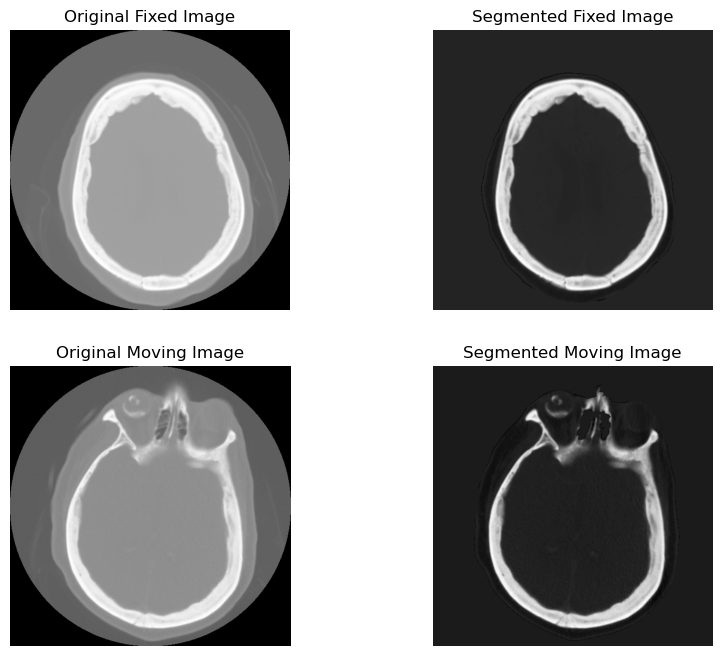

Processing Patients:   1%|          | 1/85 [00:12<18:07, 12.95s/it]

Registration successful for patient: ALFORD_BARBARA 4024996. Transform saved to D:\CTH_archive\Transforms\ALFORD_BARBARA 4024996_transform.h5


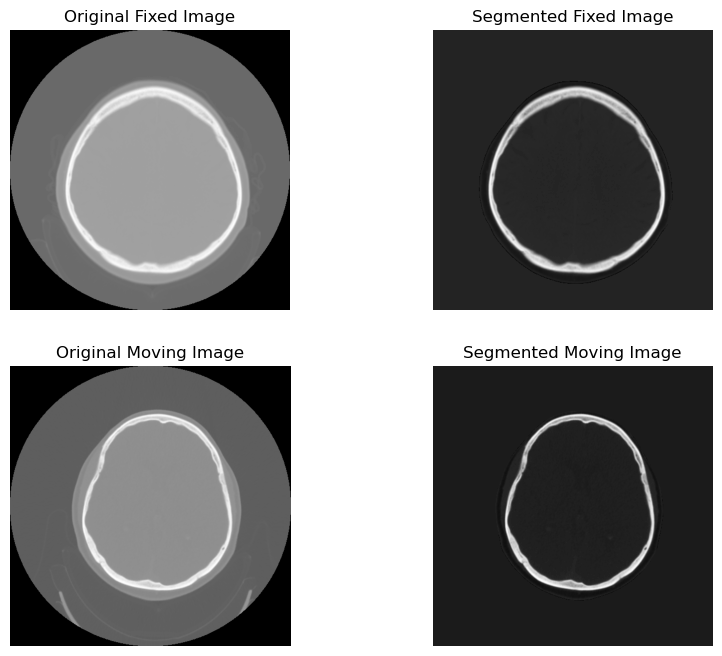

Processing Patients:   2%|▏         | 2/85 [00:24<16:26, 11.89s/it]

Registration successful for patient: ALLAH_MAJUSTICE 2621774. Transform saved to D:\CTH_archive\Transforms\ALLAH_MAJUSTICE 2621774_transform.h5


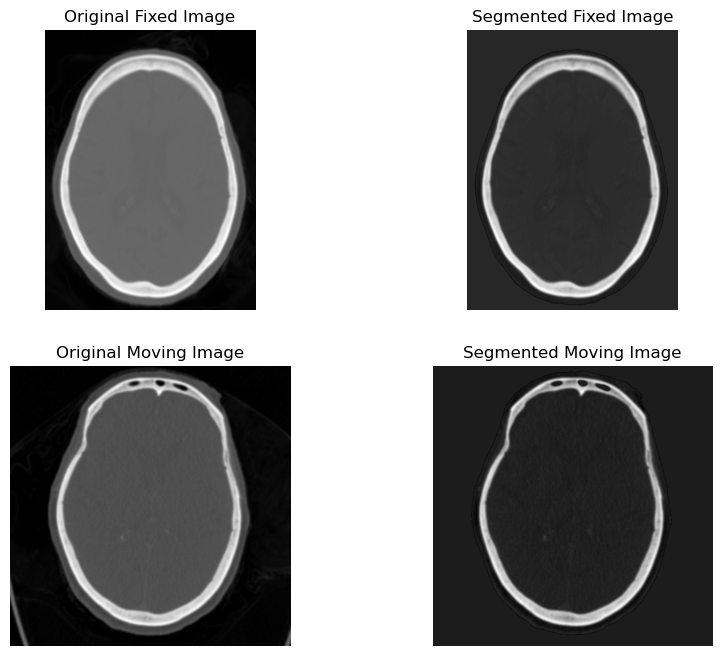

In [14]:
transforms_dir = r'D:\CTH_archive\Transforms'  # Directory to save the transforms
if not os.path.exists(transforms_dir):
    os.makedirs(transforms_dir)

resampled_images = {}  # To store the resampled images for each patient
resampled_images_transform = {}  # To store the transform files for each patient

def remove_background(image):
    threshold_value = -300  # Adjust based on your CT scans
    binary_image = sitk.BinaryThreshold(image, lowerThreshold=threshold_value, upperThreshold=3000, insideValue=1, outsideValue=0)
    morph_radius = [2, 2, 2]  # Specify as a list or tuple
    binary_image = sitk.BinaryMorphologicalOpening(binary_image, morph_radius)
    cc_filter = sitk.ConnectedComponentImageFilter()
    cc_image = cc_filter.Execute(binary_image)
    stats_filter = sitk.LabelIntensityStatisticsImageFilter()
    stats_filter.Execute(cc_image, binary_image)
    largest_label = max(stats_filter.GetLabels(), key=lambda x: stats_filter.GetPhysicalSize(x))
    binary_image = sitk.BinaryThreshold(cc_image, lowerThreshold=largest_label, upperThreshold=largest_label, insideValue=1, outsideValue=0)
    
    # Cast the binary_image to the same pixel type as the original image
    casted_binary_image = sitk.Cast(binary_image, image.GetPixelID())

    return image * casted_binary_image

for patient in tqdm(patients_with_all_folders, desc='Processing Patients'):
    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])

        # Read DICOM series
        moving_image = read_dicom_series(ctp_dicom_directory)
        fixed_image = read_dicom_series(cth_dicom_directory)
        

        # Remove background from the moving and fixed images
        segmented_moving_image = remove_background(moving_image)
        segmented_fixed_image = remove_background(fixed_image)
        
    
           # Read DICOM series and apply histogram normalization
        moving_image = read_dicom_series(ctp_dicom_directory)
        moving_image_min = float(sitk.GetArrayFromImage(moving_image).min())
        moving_image_max = float(sitk.GetArrayFromImage(moving_image).max())
        moving_image = sitk.IntensityWindowing(moving_image,
                                            windowMinimum=moving_image_min,
                                            windowMaximum=moving_image_max,
                                            outputMinimum=0.0,
                                            outputMaximum=1.0)

        fixed_image = read_dicom_series(cth_dicom_directory)
        fixed_image_min = float(sitk.GetArrayFromImage(fixed_image).min())
        fixed_image_max = float(sitk.GetArrayFromImage(fixed_image).max())
        fixed_image = sitk.IntensityWindowing(fixed_image,
                                            windowMinimum=fixed_image_min,
                                            windowMaximum=fixed_image_max,
                                            outputMinimum=0.0,
                                            outputMaximum=1.0)





        # Registration code (unchanged)
        # Visualization code (unchanged)
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        axs[0, 0].imshow(sitk.GetArrayFromImage(fixed_image)[fixed_image.GetSize()[2] // 2], cmap='gray')
        axs[0, 0].set_title('Original Fixed Image')
        axs[0, 0].axis('off')
        axs[0, 1].imshow(sitk.GetArrayFromImage(segmented_fixed_image)[fixed_image.GetSize()[2] // 2], cmap='gray')
        axs[0, 1].set_title('Segmented Fixed Image')
        axs[0, 1].axis('off')
        axs[1, 0].imshow(sitk.GetArrayFromImage(moving_image)[moving_image.GetSize()[2] // 2], cmap='gray')
        axs[1, 0].set_title('Original Moving Image')
        axs[1, 0].axis('off')
        axs[1, 1].imshow(sitk.GetArrayFromImage(segmented_moving_image)[moving_image.GetSize()[2] // 2], cmap='gray')
        axs[1, 1].set_title('Segmented Moving Image')
        axs[1, 1].axis('off')
        plt.show()

        # Registration code (unchanged)
        registration_method = sitk.ImageRegistrationMethod()
        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
        registration_method.SetMetricSamplingPercentage(0.5, sitk.sitkWallClock)
        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=300, convergenceMinimumValue=1e-6, convergenceWindowSize=20)
        registration_method.SetOptimizerScalesFromPhysicalShift()
        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[8, 4, 2])
        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[4, 2, 1])
        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
        initial_transform = sitk.CenteredTransformInitializer(fixed_image, moving_image, sitk.AffineTransform(fixed_image.GetDimension()), sitk.CenteredTransformInitializerFilter.MOMENTS)
        registration_method.SetInitialTransform(initial_transform)
        try:
            final_transform = registration_method.Execute(segmented_fixed_image, segmented_moving_image)
            resampled_image = sitk.Resample(segmented_moving_image, segmented_fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
            resampled_images[patient] = resampled_image
            transform_file = os.path.join(transforms_dir, f'{patient}_transform.h5')
            sitk.WriteTransform(final_transform, transform_file)
            resampled_images_transform[patient] = transform_file
            print(f"Registration successful for patient: {patient}. Transform saved to {transform_file}")
        except RuntimeError as e:
            print(f"Registration failed for patient {patient}: {e}")



BSPLINE KIND OF WORKING BELOW

In [ ]:
def display_image_slices(fixed_image, moving_image, transformed_image):
    # Convert SimpleITK images to arrays for easier manipulation
    fixed_image_array = sitk.GetArrayFromImage(fixed_image)
    transformed_image_array = sitk.GetArrayFromImage(transformed_image)

    # Determine the maximum number of slices from the fixed and transformed images
    max_slices = max(fixed_image.GetSize()[2], transformed_image.GetSize()[2])

    def update_slice(slice_idx):
        # Create figure with 2 subplots
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Display the fixed image slice
        axs[0].imshow(fixed_image_array[slice_idx], cmap='gray')
        axs[0].set_title('Fixed Image')

        # Display the overlay: fixed image slice with the transformed image slice overlaid with transparency
        if slice_idx < transformed_image_array.shape[0]:
            axs[1].imshow(fixed_image_array[slice_idx], cmap='gray')
            axs[1].imshow(transformed_image_array[slice_idx], cmap='jet', alpha=0.5)  # Adjust alpha for desired transparency
            axs[1].set_title('Overlay: Fixed + Transformed Image')
        else:
            axs[1].text(0.5, 0.5, 'Slice not available', horizontalalignment='center', verticalalignment='center')
            axs[1].set_title('Overlay: Fixed + Transformed Image')

        # Turn off axis for all subplots
        for ax in axs:
            ax.axis('off')

        plt.show()

    # Create a slider widget for slice selection
    slice_slider = widgets.IntSlider(min=0, max=max_slices-1, step=1, value=max_slices//2, description='Slice')

    # Display the widget and use `interactive_output` to connect the slider with the update function
    interactive_output = widgets.interactive_output(update_slice, {'slice_idx': slice_slider})
    display(slice_slider, interactive_output)

In [ ]:
patient_id = "ALLAH_MAJUSTICE 2621774"

ctp_dicom_directory = os.path.dirname(patient_files[patient_id]['CTP_DICOM'][0])
cth_dicom_directory = os.path.dirname(patient_files[patient_id]['CTH_DICOM'][0])

moving_image = read_dicom_series(ctp_dicom_directory)
fixed_image = read_dicom_series(cth_dicom_directory)

# Getting the transformed (resampled) image from your results
transformed_image = resampled_images[patient_id]

display_image_slices(fixed_image, moving_image, transformed_image)

IntSlider(value=16, description='Slice', max=31)

Output()

In [ ]:
def display_fusion(fixed_image, registered_image):
    fixed_array = sitk.GetArrayFromImage(fixed_image)
    registered_array = sitk.GetArrayFromImage(registered_image)

    # Ensure the images are in the same size for overlay
    registered_resampled = sitk.Resample(registered_image, fixed_image)

    # Convert SimpleITK images to arrays
    fixed_array = sitk.GetArrayFromImage(fixed_image)
    registered_array = sitk.GetArrayFromImage(registered_resampled)

    # Choose a slice in the middle of the volume to display
    slice_idx = fixed_array.shape[0] // 2

    # Create a fusion image by overlaying the registered image on the fixed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(fixed_array[slice_idx], cmap='gray')
    plt.title('Fixed Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(fixed_array[slice_idx], cmap='gray')
    plt.imshow(registered_array[slice_idx], cmap='jet', alpha=0.5)  # Adjust alpha for transparency
    plt.title('Fusion Visualization')
    plt.axis('off')

    plt.show()

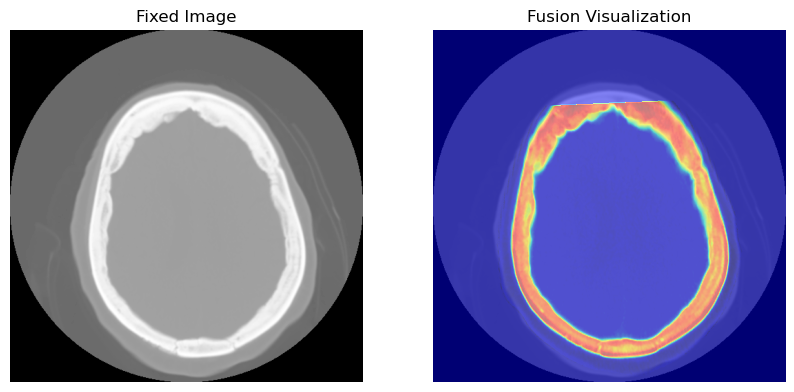

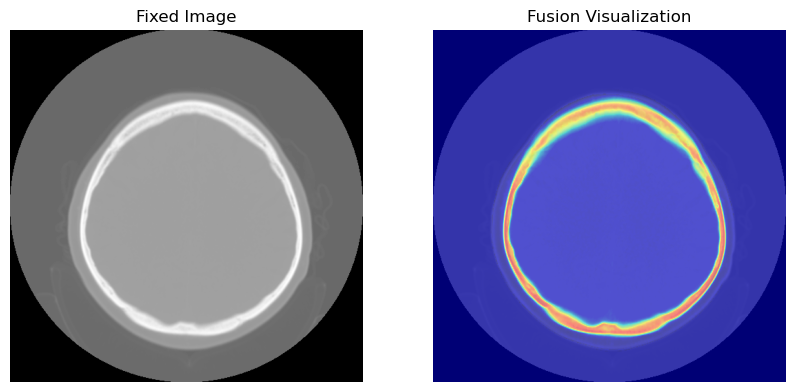

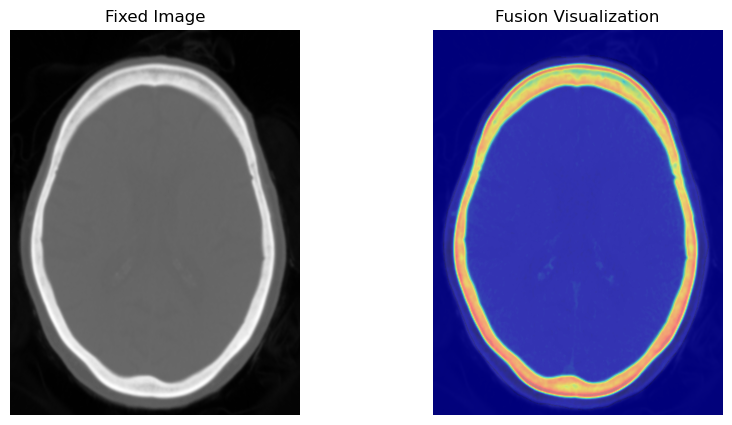

Missing DICOM files for patient BAUM_ROBERT 6035108
Missing DICOM files for patient BILLIPS_JAMES 6272788


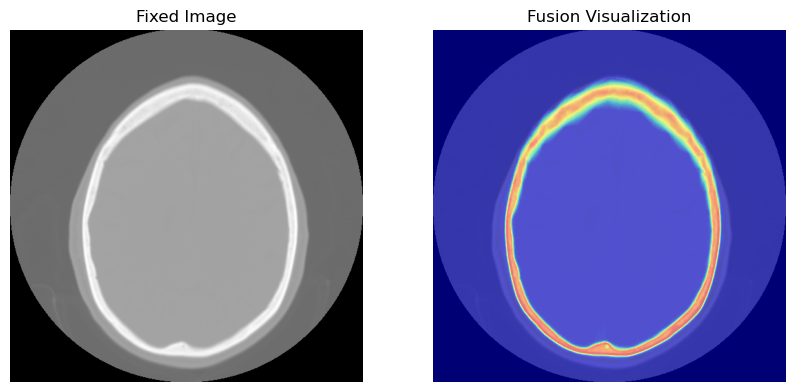

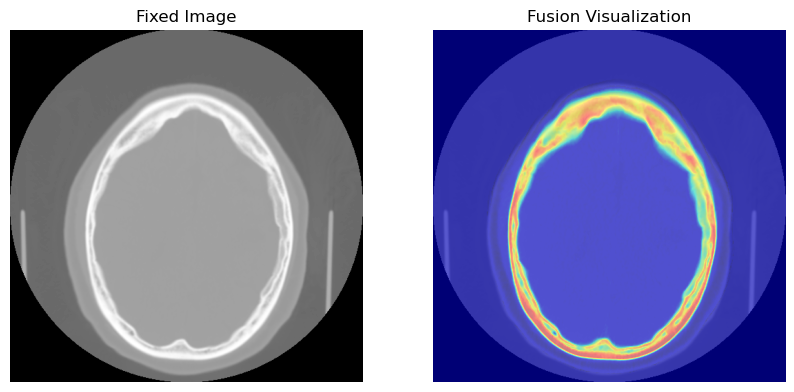

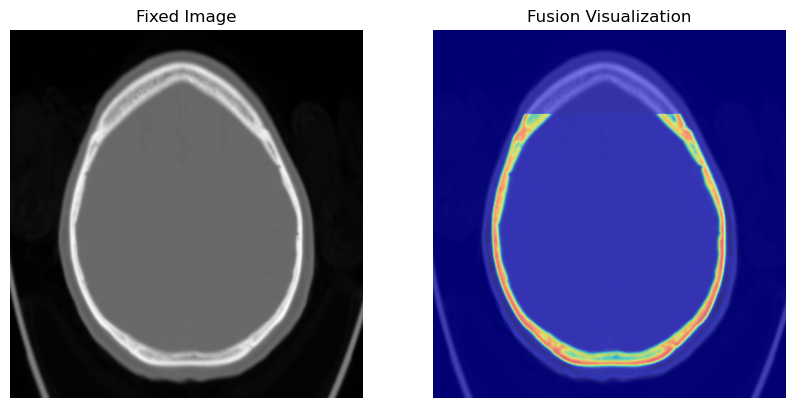

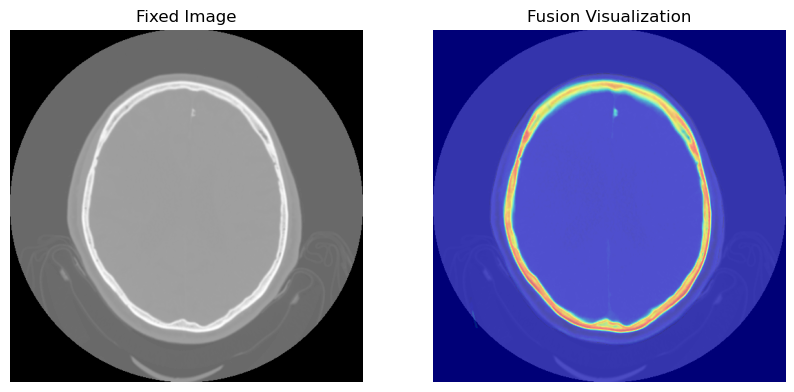

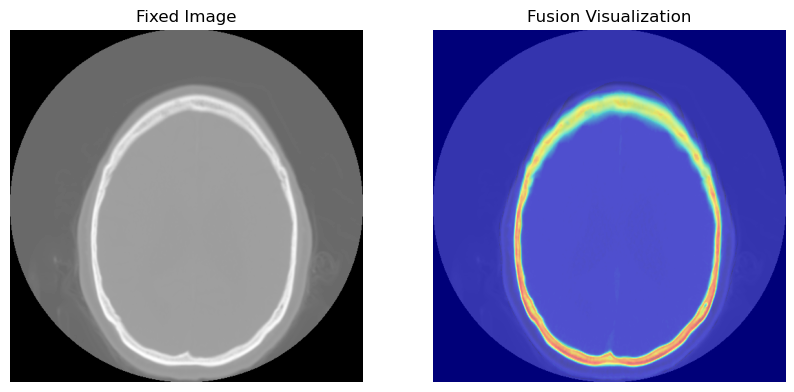

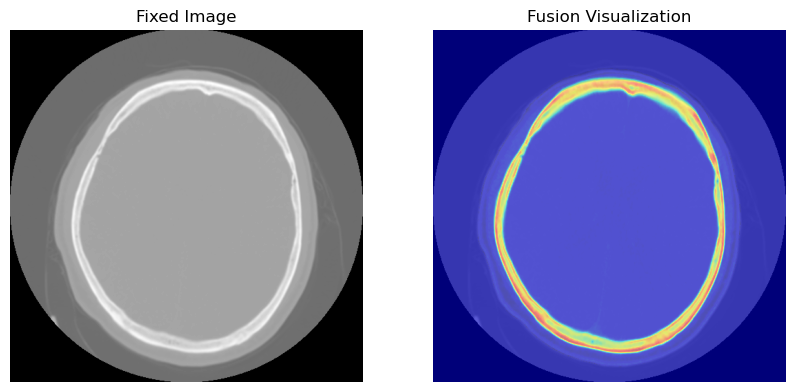

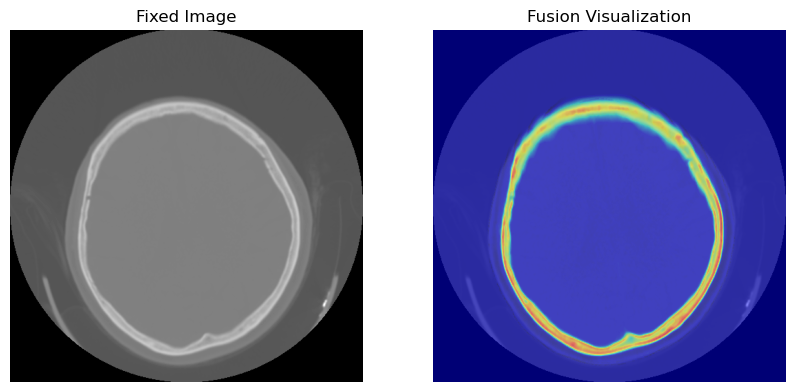

No transformed image for patient CHEN_XIU_D 6497146
Missing DICOM files for patient CHEUNG_SIU-LING_LING_WOO 3225143
No transformed image for patient CHOWDHURY_SALMA_K 7027943
No transformed image for patient CLARKSON-FARRELL_EDWARD 7011907
Missing DICOM files for patient COLLADOTORRES_URIBES_A 4287635
No transformed image for patient COMPRES_THELMA 3079376
Missing DICOM files for patient COOPER_SUSAN 7231004
No transformed image for patient CRUZ_MIRIAN 1627349
No transformed image for patient DAMBOISE_JACQUES_J 1895572
Missing DICOM files for patient DEGRAFT_NYUMUTSU_E E632751
No transformed image for patient DONALDSON_GEORGIANNA A432494
No transformed image for patient DUMA_ZBIGNIEW F328178
Missing DICOM files for patient EASON_CHARLES 8316397
No transformed image for patient ELISA-WRIGHT_KANZADER 7731069
Missing DICOM files for patient FERNANDEZ_LUIS A392276
No transformed image for patient FILION_JULIO 2159066
No transformed image for patient FILI_CHARLES 1172073
No transformed ima

In [ ]:
for patient_id in patient_files.keys():
    # Check if 'CTP_DICOM' and 'CTH_DICOM' lists have elements
    if patient_files[patient_id]['CTP_DICOM'] and patient_files[patient_id]['CTH_DICOM']:
        # Define directories
        ctp_dicom_directory = os.path.dirname(patient_files[patient_id]['CTP_DICOM'][0])
        cth_dicom_directory = os.path.dirname(patient_files[patient_id]['CTH_DICOM'][0])

        # Read DICOM series
        moving_image = read_dicom_series(ctp_dicom_directory)
        fixed_image = read_dicom_series(cth_dicom_directory)

        # Assuming transformations have been applied and the transformed images are stored
        transformed_image = resampled_images.get(patient_id)  # Using .get() to avoid KeyError if patient_id is not in resampled_images

        if transformed_image:  # Check if transformed_image exists for the patient_id
            # Display fusion for the middle slice of each patient's fixed and transformed images
            display_fusion(fixed_image, transformed_image)
        else:
            print(f"No transformed image for patient {patient_id}")
    else:
        print(f"Missing DICOM files for patient {patient_id}")


In [ ]:
#def convert_series_to_nifti(input_directory, output_file):
#    reader = sitk.ImageSeriesReader()
#    dicom_names = reader.GetGDCMSeriesFileNames(input_directory)
#    reader.SetFileNames(dicom_names)
#    image_series = reader.Execute()
#    
#    # Convert to numpy array to manipulate the pixel data directly
#    img_array = sitk.GetArrayFromImage(image_series)
#
#    # Check if the image needs to be converted to grayscale
#    if image_series.GetNumberOfComponentsPerPixel() > 1:
#        img_array = np.mean(img_array, axis=-1).astype(np.uint16)
#
#        img_array[:, :35, :] = 0  # Remove TAMX label
#        img_array[:, :, :35] = 0 # Remove scale on  the left
#    
#    # Convert the numpy array back to a SimpleITK Image
#    processed_image = sitk.GetImageFromArray(img_array)
#    processed_image.SetSpacing(image_series.GetSpacing())
#    processed_image.SetOrigin(image_series.GetOrigin())
#    processed_image.SetDirection(image_series.GetDirection())
#
#    # Write the processed image as a NIfTI file
#    sitk.WriteImage(processed_image, output_file)
#
#root_directory = r'D:\CTH_archive\TMAX_DICOM'
#
#for patient_dir in os.listdir(root_directory):
#    patient_path = os.path.join(root_directory, patient_dir)
#    if os.path.isdir(patient_path):
#        for series_dir in os.listdir(patient_path):
#            series_path = os.path.join(patient_path, series_dir)
#            if os.path.isdir(series_path):
#                output_nifti_file = os.path.join(patient_path, f"{series_dir}.nii")
#                print(f"Converting {series_path} to NIfTI...")
#                convert_series_to_nifti(series_path, output_nifti_file)

In [ ]:
output_dir = os.path.join(r'D:\CTH_archive\Registered_NIfTI')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

successful_patients = list(resampled_images.keys())

for patient_id in successful_patients:
    patient_directory = os.path.join(r'D:\CTH_archive\TMAX_DICOM', patient_id)
    
    nifti_files = [f for f in os.listdir(patient_directory) if f.endswith('.nii')]
    if not nifti_files:
        print(f"No NIfTI file found for patient {patient_id}.")
        continue

    nifti_file = nifti_files[0]
    nifti_file_path = os.path.join(patient_directory, nifti_file)
    moving_image = sitk.ReadImage(nifti_file_path)
    
    ctp_directory_base = os.path.join(r'D:\CTH_archive\CTP_DICOM', patient_id)
    study_dirs = [d for d in os.listdir(ctp_directory_base) if os.path.isdir(os.path.join(ctp_directory_base, d))]
    if not study_dirs:
        print(f"No CTP study found for patient {patient_id} in {ctp_directory_base}.")
        continue

    ctp_directory = os.path.join(ctp_directory_base, study_dirs[0])
    ctp_image = read_dicom_series(ctp_directory)

    fixed_image_base_dir = os.path.join(r'D:\CTH_archive\CTH_DICOM', patient_id)
    
    series_dirs = [d for d in os.listdir(fixed_image_base_dir) if os.path.isdir(os.path.join(fixed_image_base_dir, d))]
    if not series_dirs:
        print(f"No DICOM series found for patient {patient_id} in {fixed_image_base_dir}.")
        continue

    fixed_image_dir = os.path.join(fixed_image_base_dir, series_dirs[0])
    fixed_image = read_dicom_series(fixed_image_dir)
    print(f"Fixed image file: {fixed_image_dir}")
    
    #plt.imshow(sitk.GetArrayFromImage(fixed_image)[10,:,:])
    print(f"Size of fixed image: {fixed_image.GetSize()}")
    
    desired_size = [512, 512, moving_image.GetSize()[2]]
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(moving_image)
    resampler.SetSize(desired_size)
    resampler.SetOutputSpacing([moving_image.GetSpacing()[i] * (moving_image.GetSize()[i] / desired_size[i]) for i in range(3)])
    resampler.SetTransform(sitk.Transform())
    resampler.SetInterpolator(sitk.sitkLinear)
    resized_image = resampler.Execute(moving_image)
    
    resized_image.SetSpacing(ctp_image.GetSpacing())
    resized_image.SetOrigin(ctp_image.GetOrigin())
    print(f"rezided image size: {resized_image.GetSize()}")
    print(f"rezided image spacing: {resized_image.GetSpacing()}")
    print(f"resized image origin: {resized_image.GetOrigin()}") 
    # Load the final transform from the file path stored in resampled_images
    transform_file_path = resampled_images_transform[patient_id]
    if os.path.exists(transform_file_path):
        print(f"Loading transform from {transform_file_path}")
        final_transform = sitk.ReadTransform(transform_file_path)
    else:
        print(f"Transform file for patient {patient_id} not found at {transform_file_path}.")
        continue

    resampled_image = sitk.Resample(resized_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, resized_image.GetPixelID())
    output_path = os.path.join(output_dir, os.path.basename(patient_directory) + '_registered.nii')

    sitk.WriteImage(resampled_image, output_path)

    print(f"Processed and saved registered image for patient: {patient_id}")

Fixed image file: D:\CTH_archive\CTH_DICOM\ALFORD_BARBARA 4024996\2019-11-30 160357
Size of fixed image: (512, 512, 32)
rezided image size: (512, 512, 23)
rezided image spacing: (0.429688, 0.429688, 5.0)
resized image origin: (-105.3, -116.7, -49.75)
Loading transform from D:\CTH_archive\Transforms\ALFORD_BARBARA 4024996_transform.h5
Processed and saved registered image for patient: ALFORD_BARBARA 4024996
Fixed image file: D:\CTH_archive\CTH_DICOM\ALLAH_MAJUSTICE 2621774\2020-07-21 192822
Size of fixed image: (512, 512, 32)
rezided image size: (512, 512, 23)
rezided image spacing: (0.535156, 0.535156, 5.0)
resized image origin: (-137.0, -150.5, -6.25)
Loading transform from D:\CTH_archive\Transforms\ALLAH_MAJUSTICE 2621774_transform.h5
Processed and saved registered image for patient: ALLAH_MAJUSTICE 2621774
Fixed image file: D:\CTH_archive\CTH_DICOM\BATTLE_MARIA 8399298\2021-01-03 082846
Size of fixed image: (512, 680, 31)
rezided image size: (512, 512, 49)
rezided image spacing: (0.3

Processing Patients:   0%|          | 0/10 [00:00<?, ?it/s]

Loading transform from D:\CTH_archive\Transforms\ALFORD_BARBARA 4024996_transform.h5


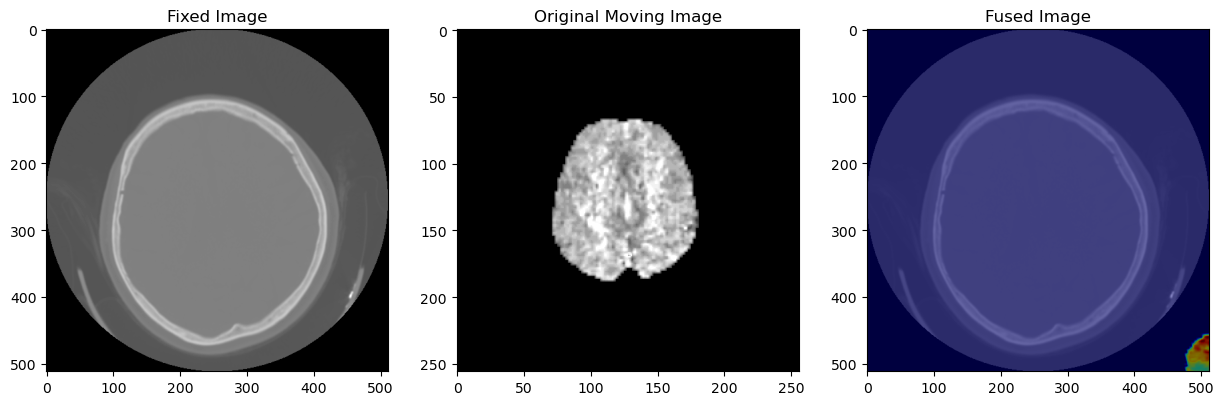

Processing Patients:  10%|█         | 1/10 [00:00<00:02,  3.23it/s]

Processed and saved registered image for patient: ALFORD_BARBARA 4024996
Loading transform from D:\CTH_archive\Transforms\ALLAH_MAJUSTICE 2621774_transform.h5


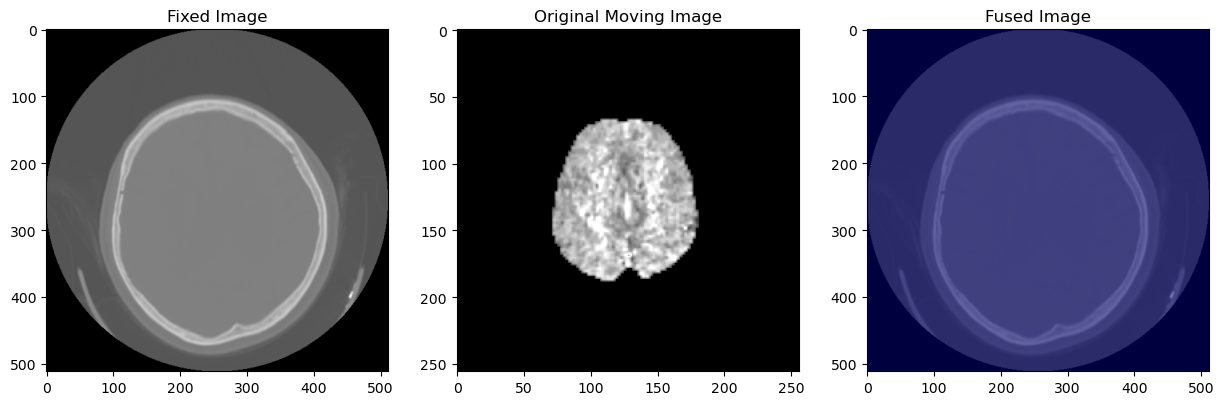

Processing Patients:  20%|██        | 2/10 [00:00<00:02,  3.16it/s]

Processed and saved registered image for patient: ALLAH_MAJUSTICE 2621774
Loading transform from D:\CTH_archive\Transforms\BATTLE_MARIA 8399298_transform.h5


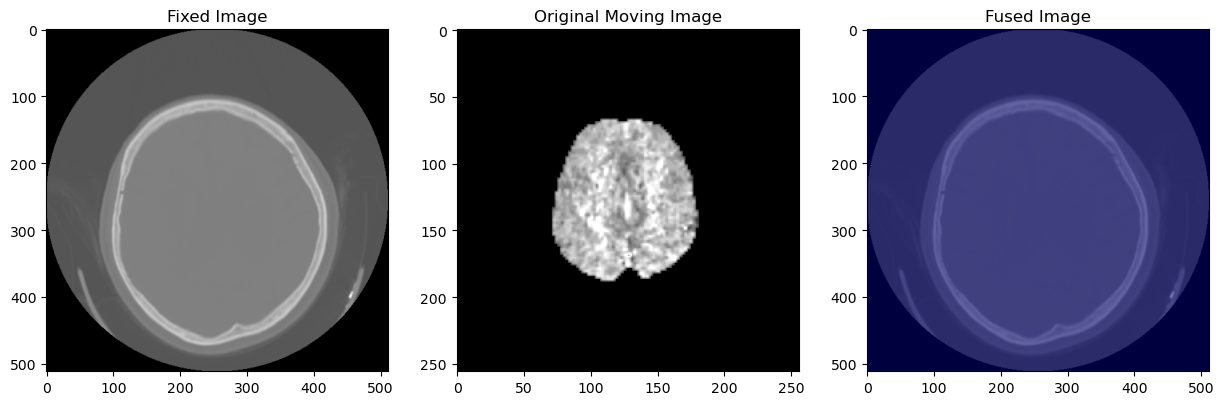

Processing Patients:  30%|███       | 3/10 [00:01<00:02,  2.91it/s]

Processed and saved registered image for patient: BATTLE_MARIA 8399298
Loading transform from D:\CTH_archive\Transforms\BOGER_DAVID_S 2532249_transform.h5


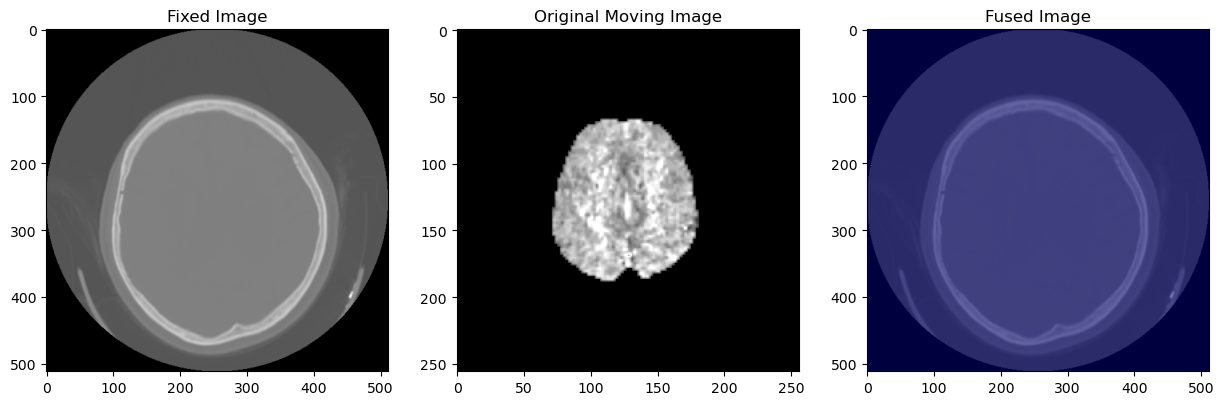

Processing Patients:  40%|████      | 4/10 [00:01<00:01,  3.04it/s]

Processed and saved registered image for patient: BOGER_DAVID_S 2532249
Loading transform from D:\CTH_archive\Transforms\BROWN_ANTHONY F341525_transform.h5


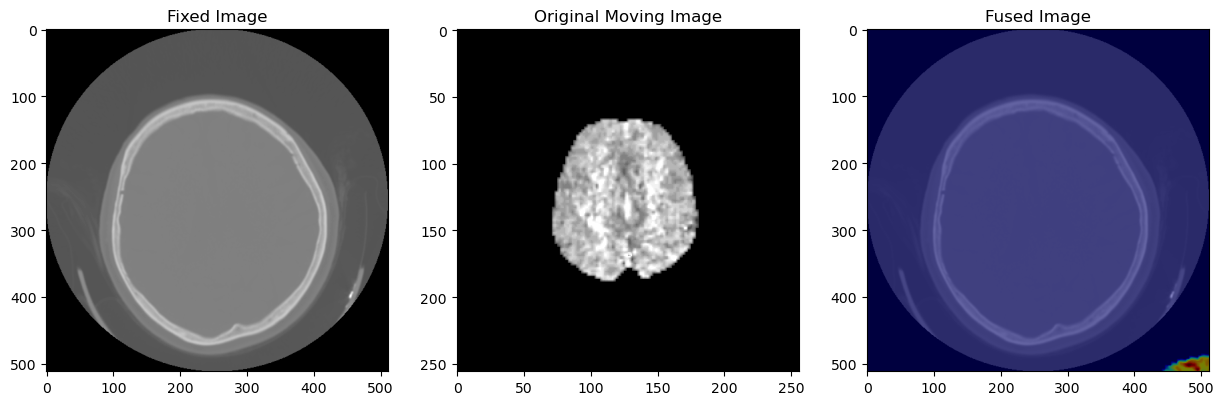

Processing Patients:  50%|█████     | 5/10 [00:01<00:01,  3.09it/s]

Processed and saved registered image for patient: BROWN_ANTHONY F341525
Loading transform from D:\CTH_archive\Transforms\CAMPAGNA_HARRY_D E304749_transform.h5


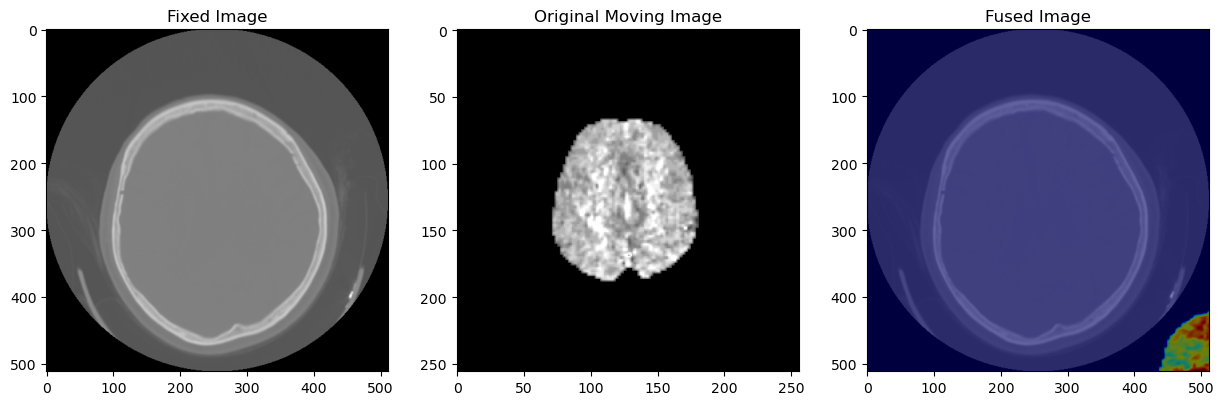

Processing Patients:  60%|██████    | 6/10 [00:01<00:01,  3.11it/s]

Processed and saved registered image for patient: CAMPAGNA_HARRY_D E304749
Loading transform from D:\CTH_archive\Transforms\CANIGLIA_ROBERT 2363078_transform.h5


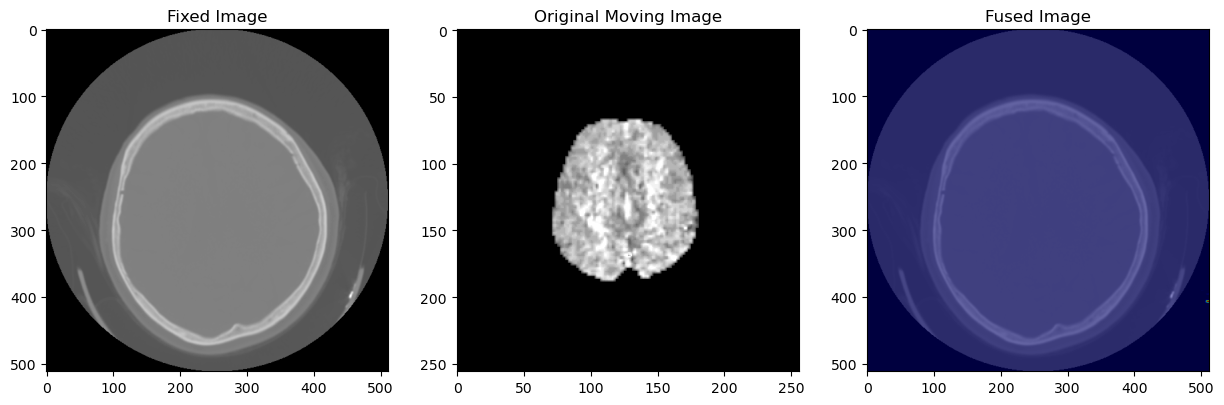

Processing Patients:  70%|███████   | 7/10 [00:02<00:00,  3.15it/s]

Processed and saved registered image for patient: CANIGLIA_ROBERT 2363078
Loading transform from D:\CTH_archive\Transforms\CARDIN_PAUL E570140_transform.h5


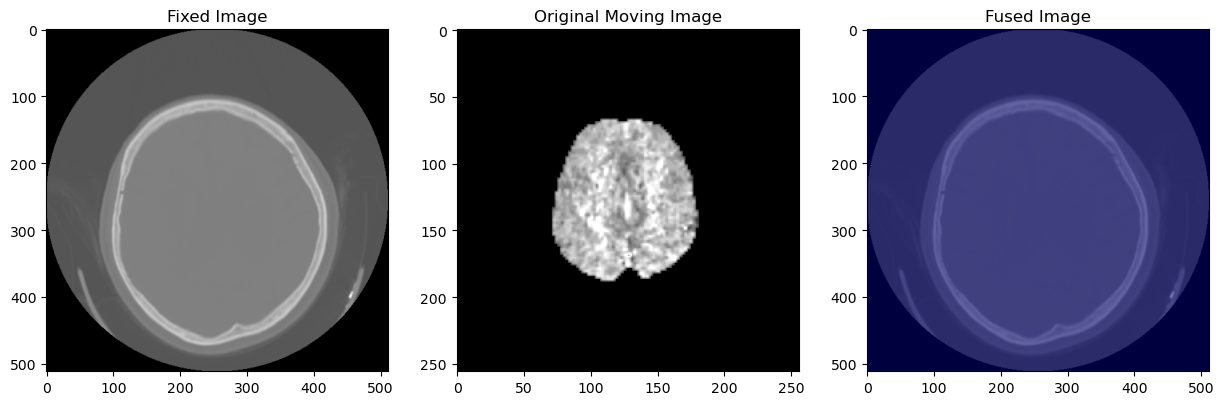

Processing Patients:  80%|████████  | 8/10 [00:02<00:00,  3.14it/s]

Processed and saved registered image for patient: CARDIN_PAUL E570140
Loading transform from D:\CTH_archive\Transforms\CHANG_WAH_KONG 5708968_transform.h5


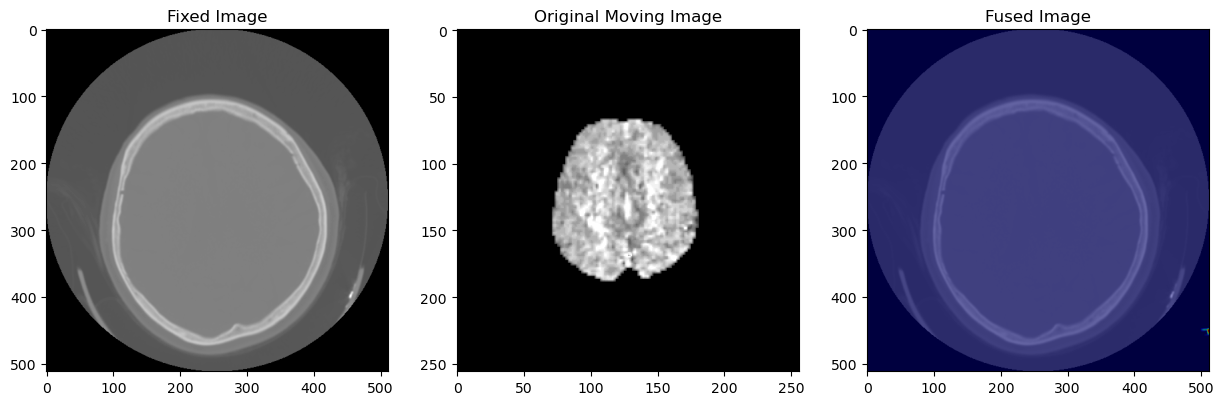

Processing Patients:  90%|█████████ | 9/10 [00:02<00:00,  3.17it/s]

Processed and saved registered image for patient: CHANG_WAH_KONG 5708968
Loading transform from D:\CTH_archive\Transforms\CHEN_QIAOYING F262455_transform.h5


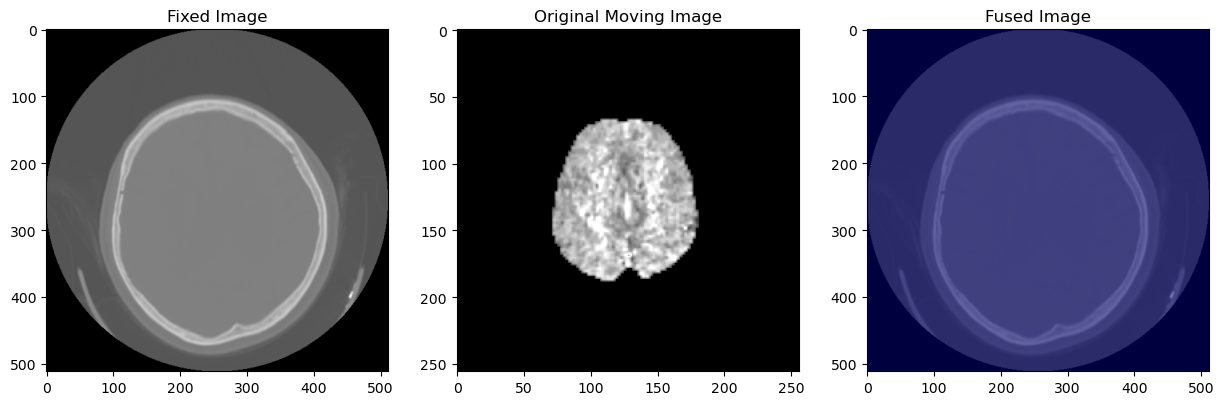

Processing Patients: 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

Processed and saved registered image for patient: CHEN_QIAOYING F262455


In [13]:

output_dir = os.path.join(r'D:\CTH_archive\Registered_NIfTI')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
successful_patients = list(resampled_images.keys())
for patient_id in tqdm(successful_patients, desc='Processing Patients'):
    transform_file_path = resampled_images_transform[patient_id]
    
    if not os.path.exists(transform_file_path):
        print(f"Transform file for patient {patient_id} not found at {transform_file_path}.")
        continue

    # Assuming fixed_image and moving_image have been previously defined in your code
    print(f"Loading transform from {transform_file_path}")
    final_transform = sitk.ReadTransform(transform_file_path)

    # Apply the transform to the moving image to align it with the fixed image
    moving_image_transformed = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

    # Convert SimpleITK images to NumPy arrays for visualization
    fixed_image_np = sitk.GetArrayFromImage(fixed_image)
    moving_image_np = sitk.GetArrayFromImage(moving_image)  # Original moving image
    moving_image_transformed_np = sitk.GetArrayFromImage(moving_image_transformed)  # Transformed (registered) moving image

    # Select the middle slice of the 3D volume to display
    slice_idx = fixed_image_np.shape[0] // 2

    # Display the fixed, moving, and fused images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(fixed_image_np[slice_idx, :, :], cmap='gray')
    plt.title('Fixed Image')
    plt.subplot(1, 3, 2)
    plt.imshow(moving_image_np[slice_idx, :, :], cmap='gray')
    plt.title('Original Moving Image')
    plt.subplot(1, 3, 3)
    plt.imshow(fixed_image_np[slice_idx, :, :], cmap='gray')
    plt.imshow(moving_image_transformed_np[slice_idx, :, :], cmap='jet', alpha=0.5)  # Overlay with transparency
    plt.title('Fused Image')
    plt.show()

    # Save the transformed (registered) moving image
    output_path = os.path.join(output_dir, f'{patient_id}_registered.nii')
    sitk.WriteImage(moving_image_transformed, output_path)
    print(f"Processed and saved registered image for patient: {patient_id}")
